In [21]:
import numpy as np
import os
import xml.etree.ElementTree as ET
from typing import List, Tuple, Union
from collections import defaultdict
from detectron2.utils.file_io import PathManager
import itertools
import seaborn as sns

CLASS_NAMES = (
    "aeroplane", "bicycle", "bird", "boat", "bottle", "bus", "car", "cat",
    "chair", "cow", "diningtable", "dog", "horse", "motorbike", "person",
    "pottedplant", "sheep", "sofa", "train", "tvmonitor"
)

UNK_CLASS = ["unknown"]

VOC_CLASS_NAMES = [
"aeroplane", "bicycle", "bird", "boat", "bottle", "bus", "car", "cat",
"chair", "cow", "diningtable", "dog", "horse", "motorbike", "person",
"pottedplant", "sheep", "sofa", "train", "tvmonitor"
]

VOC_CLASS_NAMES_COCOFIED = [
    "airplane",  "dining table", "motorcycle",
    "potted plant", "couch", "tv"
]

BASE_VOC_CLASS_NAMES = [
    "aeroplane", "diningtable", "motorbike",
    "pottedplant",  "sofa", "tvmonitor"
]

T2_CLASS_NAMES = [
    "truck", "traffic light", "fire hydrant", "stop sign", "parking meter",
    "bench", "elephant", "bear", "zebra", "giraffe",
    "backpack", "umbrella", "handbag", "tie", "suitcase",
    "microwave", "oven", "toaster", "sink", "refrigerator"
]

T3_CLASS_NAMES = [
    "frisbee", "skis", "snowboard", "sports ball", "kite",
    "baseball bat", "baseball glove", "skateboard", "surfboard", "tennis racket",
    "banana", "apple", "sandwich", "orange", "broccoli",
    "carrot", "hot dog", "pizza", "donut", "cake"
]

T4_CLASS_NAMES = [
    "bed", "toilet", "laptop", "mouse",
    "remote", "keyboard", "cell phone", "book", "clock",
    "vase", "scissors", "teddy bear", "hair drier", "toothbrush",
    "wine glass", "cup", "fork", "knife", "spoon", "bowl"
]


VOC_COCO_CLASS_NAMES = {}
# Used for the original dataset benchmark
VOC_COCO_CLASS_NAMES["TOWOD"] = tuple(itertools.chain(VOC_CLASS_NAMES, T2_CLASS_NAMES, T3_CLASS_NAMES, T4_CLASS_NAMES, UNK_CLASS))


def load_voc_instances(dirname: str, split: str, class_names: Union[List[str], Tuple[str, ...]]):
    """
    Load Pascal VOC detection annotations to Detectron2 format.
    Args:
        dirname: Contain "Annotations", "ImageSets", "JPEGImages"
        split (str): one of "train", "test", "val", "trainval"
        class_names: list or tuple of class names
    """
    with PathManager.open(os.path.join(dirname, "ImageSets", "Main", split + ".txt")) as f:
        fileids = np.loadtxt(f, dtype=str)
    annotation_dirname = PathManager.get_local_path(os.path.join(dirname, "Annotations/"))
    class_counts = defaultdict(int)
    for fileid in fileids:
        anno_file = os.path.join(annotation_dirname, fileid + ".xml")
        jpeg_file = os.path.join(dirname, "JPEGImages", fileid + ".jpg")
        with PathManager.open(anno_file) as f:
            tree = ET.parse(f)
        r = {
            "file_name": jpeg_file,
            "image_id": fileid,
            "height": int(tree.findall("./size/height")[0].text),
            "width": int(tree.findall("./size/width")[0].text),
        }
        for obj in tree.findall("object"):
            cls = obj.find("name").text
            if cls in VOC_CLASS_NAMES_COCOFIED:
                cls = BASE_VOC_CLASS_NAMES[VOC_CLASS_NAMES_COCOFIED.index(cls)]
            class_counts[str(class_names.index(cls))] += 1
    return class_counts

In [22]:
cc = load_voc_instances(dirname="../PROB/data/VOC2007", split="train",
                  class_names=VOC_COCO_CLASS_NAMES["TOWOD"])

In [23]:
cc

defaultdict(int,
            {'8': 4338,
             '6': 4008,
             '12': 1156,
             '14': 15576,
             '1': 1208,
             '7': 1616,
             '11': 2079,
             '18': 984,
             '0': 1285,
             '10': 1057,
             '19': 1193,
             '2': 1820,
             '4': 2116,
             '13': 1141,
             '15': 1724,
             '3': 1397,
             '17': 1211,
             '16': 1347,
             '9': 1058,
             '5': 909})

<AxesSubplot:>

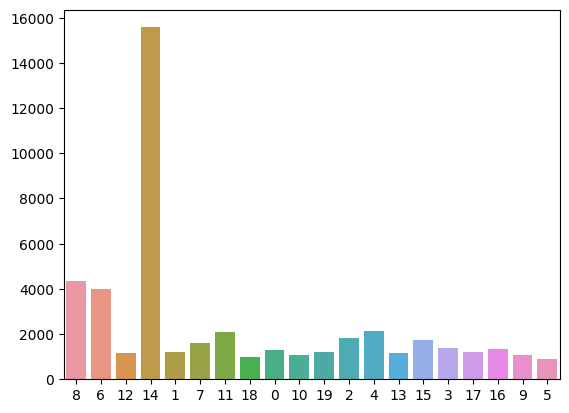

In [43]:
keys = list(cc.keys())
vals = [cc[k] for k in keys]
sns.barplot(x=keys, y=vals)

In [45]:
VOC_COCO_CLASS_NAMES["TOWOD"][:20]
name_count = defaultdict(int)
for k, v in sorted_dict.items():
    name_count[VOC_COCO_CLASS_NAMES["TOWOD"][int(k)]] = v
name_count

defaultdict(int,
            {'aeroplane': 1285,
             'bicycle': 1208,
             'bird': 1820,
             'boat': 1397,
             'bottle': 2116,
             'bus': 909,
             'car': 4008,
             'cat': 1616,
             'chair': 4338,
             'cow': 1058,
             'diningtable': 1057,
             'dog': 2079,
             'horse': 1156,
             'motorbike': 1141,
             'person': 15576,
             'pottedplant': 1724,
             'sheep': 1347,
             'sofa': 1211,
             'train': 984,
             'tvmonitor': 1193})

In [46]:
total = 0
for k, v in cc.items():
    total += v

In [48]:
total

47223

In [49]:
cc['14'] / total

0.32983927323549966